In [1]:
import pandas as pd

In [2]:
data = pd.read_excel("job-skill-dataset.xlsx")

In [3]:
data

,Job_Title,Job_Type,Skill,No_of_Skills,Description,python,sql,machine learning,r,hadoop,tableau,sas,spark,java,Others
0,Data Scientist,data_scientist,"['SAP', 'SQL']",2,"[<p><b>POSITION SUMMARY</b></p>, <p>\r\r\nThe ...",0,1,0,0,0,0,0,0,0,1
1,Data Scientist,data_scientist,"['Machine Learning', 'R', 'SAS', 'SQL', 'Python']",5,"[<p><b>What do we need?</b></p>, <ul><li>\r\r\...",1,1,1,1,0,0,1,0,0,0
2,Data Scientist,data_scientist,"['Data Mining', 'Data Management', 'R', 'SAS',...",9,"[<ul><li>Validate, analyze, and conduct statis...",1,1,0,1,0,0,1,0,0,1
3,Graduate Studies Program - Data Scientist,data_scientist,['Certified Internal Auditor'],1,"[<p>Full time</p>, <p>Washington, DC metro are...",0,0,0,0,0,0,0,0,0,1
4,Data Scientist I,data_scientist,"['Statistical Software', 'Time Management', 'R...",7,[<ul><li>Assist in consultations with business...,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5215,Senior Data Engineer,data_engineer,"['Ruby', 'Hadoop', 'Scala', 'R', 'Perl', 'SAS'...",12,"[<ul><p>As a Data Software Engineer, you will ...",1,1,0,1,1,0,1,1,0,1
5216,"Principal Data Engineer (Java, Spark, Storm, AWS)",data_engineer,"['Network', 'Scala', 'Kafka', 'Java', 'MongoDB...",8,[<p>Want to change the world? How about contri...,0,0,0,0,0,0,0,1,1,1
5217,Executive Director- Architect: Data Engineerin...,data_engineer,"['Spring', 'Data Management', 'Hadoop', 'Kafka...",13,[<ul><li>Identify and solve hybrid cloud data ...,0,0,0,0,1,0,0,1,1,1
5218,"Senior Manager, Data Engineering (hands on)",data_engineer,"['Spring', 'Ruby', 'Test Automation', 'Scripti...",15,"[<p>At Capital One, we’re building a leading i...",1,0,0,0,0,0,0,0,1,1


In [4]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Step 2: Load and explore the data
print("Loading dataset...")
data = pd.read_excel("job-skill-dataset.xlsx")
print(f"Dataset shape: {data.shape}")
print("\nDataset columns:")
print(data.columns.tolist())
print("\nFirst few rows:")
print(data.head())

Loading dataset...
Dataset shape: (5220, 15)

Dataset columns:
['Job_Title', 'Job_Type', 'Skill', 'No_of_Skills', 'Description', 'python', 'sql', 'machine learning', 'r', 'hadoop', 'tableau', 'sas', 'spark', 'java', 'Others']

First few rows:
                                   Job_Title        Job_Type  \
0                             Data Scientist  data_scientist   
1                             Data Scientist  data_scientist   
2                             Data Scientist  data_scientist   
3  Graduate Studies Program - Data Scientist  data_scientist   
4                           Data Scientist I  data_scientist   

                                               Skill  No_of_Skills  \
0                                     ['SAP', 'SQL']             2   
1  ['Machine Learning', 'R', 'SAS', 'SQL', 'Python']             5   
2  ['Data Mining', 'Data Management', 'R', 'SAS',...             9   
3                     ['Certified Internal Auditor']             1   
4  ['Statistical Softw

In [7]:
# Step 3: Data Preprocessing
print("\nStep 3: Data Preprocessing")

# Check for missing values
print("\nMissing values:")
print(data.isnull().sum())

# Drop rows with missing critical columns if any
data_clean = data.dropna(subset=['Job_Type', 'Skill'])


Step 3: Data Preprocessing

Missing values:
Job_Title           0
Job_Type            0
Skill               0
No_of_Skills        0
Description         0
python              0
sql                 0
machine learning    0
r                   0
hadoop              0
tableau             0
sas                 0
spark               0
java                0
Others              0
dtype: int64


In [9]:
# Step 4: Prepare features and target variables
print("\nStep 4: Preparing features and targets")

# Define skill columns (these will be our target variables)
skill_columns = ['python', 'sql', 'machine learning', 'r', 'hadoop',
                'tableau', 'sas', 'spark', 'java', 'Others']
                # Features: Job Type (encoded)
# Targets: All skill columns

# Encode Job_Type to numerical values
label_encoder = LabelEncoder()
data_clean['Job_Type_Encoded'] = label_encoder.fit_transform(data_clean['Job_Type'])

print("Job types and their encoded values:")
for i, job_type in enumerate(label_encoder.classes_):
    print(f"{job_type}: {i}")


Step 4: Preparing features and targets
Job types and their encoded values:
data_analyst: 0
data_engineer: 1
data_scientist: 2


In [10]:
# Step 5: Prepare training data
X = data_clean[['Job_Type_Encoded']]  # Feature
y = data_clean[skill_columns]  # Multiple targets (skills)

print(f"\nFeature shape: {X.shape}")
print(f"Target shape: {y.shape}")


Feature shape: (5220, 1)
Target shape: (5220, 10)


In [11]:
# Step 6: Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=X
)

print(f"\nTraining set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")


Training set: 4176 samples
Testing set: 1044 samples


In [12]:

# Step 7: Build the model
print("\nStep 7: Building the model")

# Use MultiOutputClassifier with RandomForest for multi-label classification
model = MultiOutputClassifier(RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    max_depth=10
))

# Train the model
print("Training the model...")
model.fit(X_train, y_train)


Step 7: Building the model
Training the model...


MultiOutputClassifier(estimator=RandomForestClassifier(max_depth=10,
                                                       random_state=42))

In [13]:
# Step 8: Model Evaluation
print("\nStep 8: Model Evaluation")

# Predict on test set
y_pred = model.predict(X_test)

# Calculate accuracy for each skill
print("\nSkill-wise Accuracy:")
for i, skill in enumerate(skill_columns):
    accuracy = accuracy_score(y_test.iloc[:, i], y_pred[:, i])
    print(f"{skill}: {accuracy:.4f}")

# Overall accuracy
overall_accuracy = accuracy_score(y_test, y_pred)
print(f"\nOverall Model Accuracy: {overall_accuracy:.4f}")


Step 8: Model Evaluation

Skill-wise Accuracy:
python: 0.7356
sql: 0.5594
machine learning: 0.8084
r: 0.7222
hadoop: 0.7280
tableau: 0.7634
sas: 0.8142
spark: 0.7452
java: 0.7385
Others: 0.9435

Overall Model Accuracy: 0.0920


In [16]:
# Step 9: Create prediction function
print("\nStep 9: Creating prediction function")

def predict_skills_for_job(job_type_input):
    """
    Predict required skills for a given job type
    """
    # Map input to encoded value
    try:
        job_encoded = label_encoder.transform([job_type_input])[0]
    except ValueError:
        print(f"Job type '{job_type_input}' not found in training data.")
        print(f"Available job types: {list(label_encoder.classes_)}")
        return None

    # Create input for prediction
    input_data = pd.DataFrame({'Job_Type_Encoded': [job_encoded]})
     # Predict skills
    predicted_skills = model.predict(input_data)[0]
    predicted_proba = model.predict_proba(input_data)

    # Get skill probabilities
    skill_probabilities = []
    for i, skill in enumerate(skill_columns):
        prob = predicted_proba[i][0][1]  # Probability of skill being required
        skill_probabilities.append((skill, prob, predicted_skills[i]))

    # Sort by probability (descending)
    skill_probabilities.sort(key=lambda x: x[1], reverse=True)

    return skill_probabilities, job_encoded

def display_skill_predictions(job_type_input):
    """
    Display formatted predictions for a job type
    """
    result = predict_skills_for_job(job_type_input)
    if result is None:
        return

    skill_probabilities, job_encoded = result

    print(f"\n{'='*60}")
    print(f"SKILL PREDICTIONS FOR: {job_type_input.upper()}")
    print(f"{'='*60}")
    print(f"{'Skill':<20} {'Required':<10} {'Probability':<12}")
    print(f"{'-'*60}")

    required_skills = []
    for skill, prob, required in skill_probabilities:
        required_str = "YES" if required == 1 else "NO"
        prob_percent = f"{prob:.1%}"
        print(f"{skill:<20} {required_str:<10} {prob_percent:<12}")

        if required == 1:
           required_skills.append(skill)

    print(f"{'='*60}")
    print(f"\nRequired Skills for {job_type_input}:")
    for i, skill in enumerate(required_skills, 1):
        print(f"{i}. {skill}")


Step 9: Creating prediction function


In [17]:
# Step 10: Test the model with examples
print("\nStep 10: Testing the model")

# Test with available job types
available_jobs = label_encoder.classes_
print(f"Available job types for testing: {list(available_jobs)}")

# Test predictions for each job type
for job_type in available_jobs:
    display_skill_predictions(job_type)
    print("\n" + "="*80 + "\n")


Step 10: Testing the model
Available job types for testing: ['data_analyst', 'data_engineer', 'data_scientist']

SKILL PREDICTIONS FOR: DATA_ANALYST
Skill                Required   Probability 
------------------------------------------------------------
Others               YES        89.8%       
sql                  YES        64.5%       
tableau              NO         32.5%       
python               NO         32.0%       
r                    NO         28.2%       
sas                  NO         18.7%       
machine learning     NO         9.5%        
hadoop               NO         7.8%        
java                 NO         6.4%        
spark                NO         4.0%        

Required Skills for data_analyst:
1. Others
2. sql



SKILL PREDICTIONS FOR: DATA_ENGINEER
Skill                Required   Probability 
------------------------------------------------------------
Others               YES        99.0%       
python               YES        66.5%       
sql   

In [18]:
# Step 11: Interactive prediction function
def interactive_prediction():
    """
    Interactive function for user input
    """
    print("🤖 SMART SKILLS AND JOB ROLE MAPPING SYSTEM")
    print("Available job types:", list(label_encoder.classes_))

    while True:
        print("\n" + "="*50)
        user_input = input("\nEnter job role (or 'quit' to exit): ").strip()

        if user_input.lower() == 'quit':
            print("Thank you for using the Smart Skills Mapping System!")
            break

        if user_input in label_encoder.classes_:
            display_skill_predictions(user_input)
        else:
            print(f"❌ Job role '{user_input}' not found.")
            print("Available job roles:", list(label_encoder.classes_))

In [19]:
# Step 12: Save the model (optional)
print("\nStep 12: Saving the model")

import joblib

# Save the trained model and label encoder
model_data = {
    'model': model,
    'label_encoder': label_encoder,
    'skill_columns': skill_columns
}

joblib.dump(model_data, 'job_skill_model.pkl')
print("Model saved as 'job_skill_model.pkl'")


Step 12: Saving the model
Model saved as 'job_skill_model.pkl'


In [20]:
# Step 13: Load and test saved model (verification)
print("\nStep 13: Verifying saved model")

# Load the model
loaded_model_data = joblib.load('job_skill_model.pkl')
loaded_model = loaded_model_data['model']
loaded_encoder = loaded_model_data['label_encoder']
loaded_skill_columns = loaded_model_data['skill_columns']

print("Model loaded successfully!")
print("Available job types in loaded model:", list(loaded_encoder.classes_))



Step 13: Verifying saved model
Model loaded successfully!
Available job types in loaded model: ['data_analyst', 'data_engineer', 'data_scientist']


In [21]:
# Step 14: Start interactive prediction
print("\nStep 14: Starting interactive prediction system")
interactive_prediction()


Step 14: Starting interactive prediction system
🤖 SMART SKILLS AND JOB ROLE MAPPING SYSTEM
Available job types: ['data_analyst', 'data_engineer', 'data_scientist']


Enter job role (or 'quit' to exit): data_analyst

SKILL PREDICTIONS FOR: DATA_ANALYST
Skill                Required   Probability 
------------------------------------------------------------
Others               YES        89.8%       
sql                  YES        64.5%       
tableau              NO         32.5%       
python               NO         32.0%       
r                    NO         28.2%       
sas                  NO         18.7%       
machine learning     NO         9.5%        
hadoop               NO         7.8%        
java                 NO         6.4%        
spark                NO         4.0%        

Required Skills for data_analyst:
1. Others
2. sql


Enter job role (or 'quit' to exit): quit
Thank you for using the Smart Skills Mapping System!


In [22]:
interactive_prediction()

🤖 SMART SKILLS AND JOB ROLE MAPPING SYSTEM
Available job types: ['data_analyst', 'data_engineer', 'data_scientist']


Enter job role (or 'quit' to exit): data_scientist

SKILL PREDICTIONS FOR: DATA_SCIENTIST
Skill                Required   Probability 
------------------------------------------------------------
Others               YES        93.7%       
python               YES        76.0%       
machine learning     YES        73.4%       
r                    YES        61.5%       
sql                  NO         47.3%       
hadoop               NO         33.3%       
spark                NO         30.3%       
java                 NO         26.5%       
sas                  NO         22.0%       
tableau              NO         19.1%       

Required Skills for data_scientist:
1. Others
2. python
3. machine learning
4. r


Enter job role (or 'quit' to exit): quit
Thank you for using the Smart Skills Mapping System!


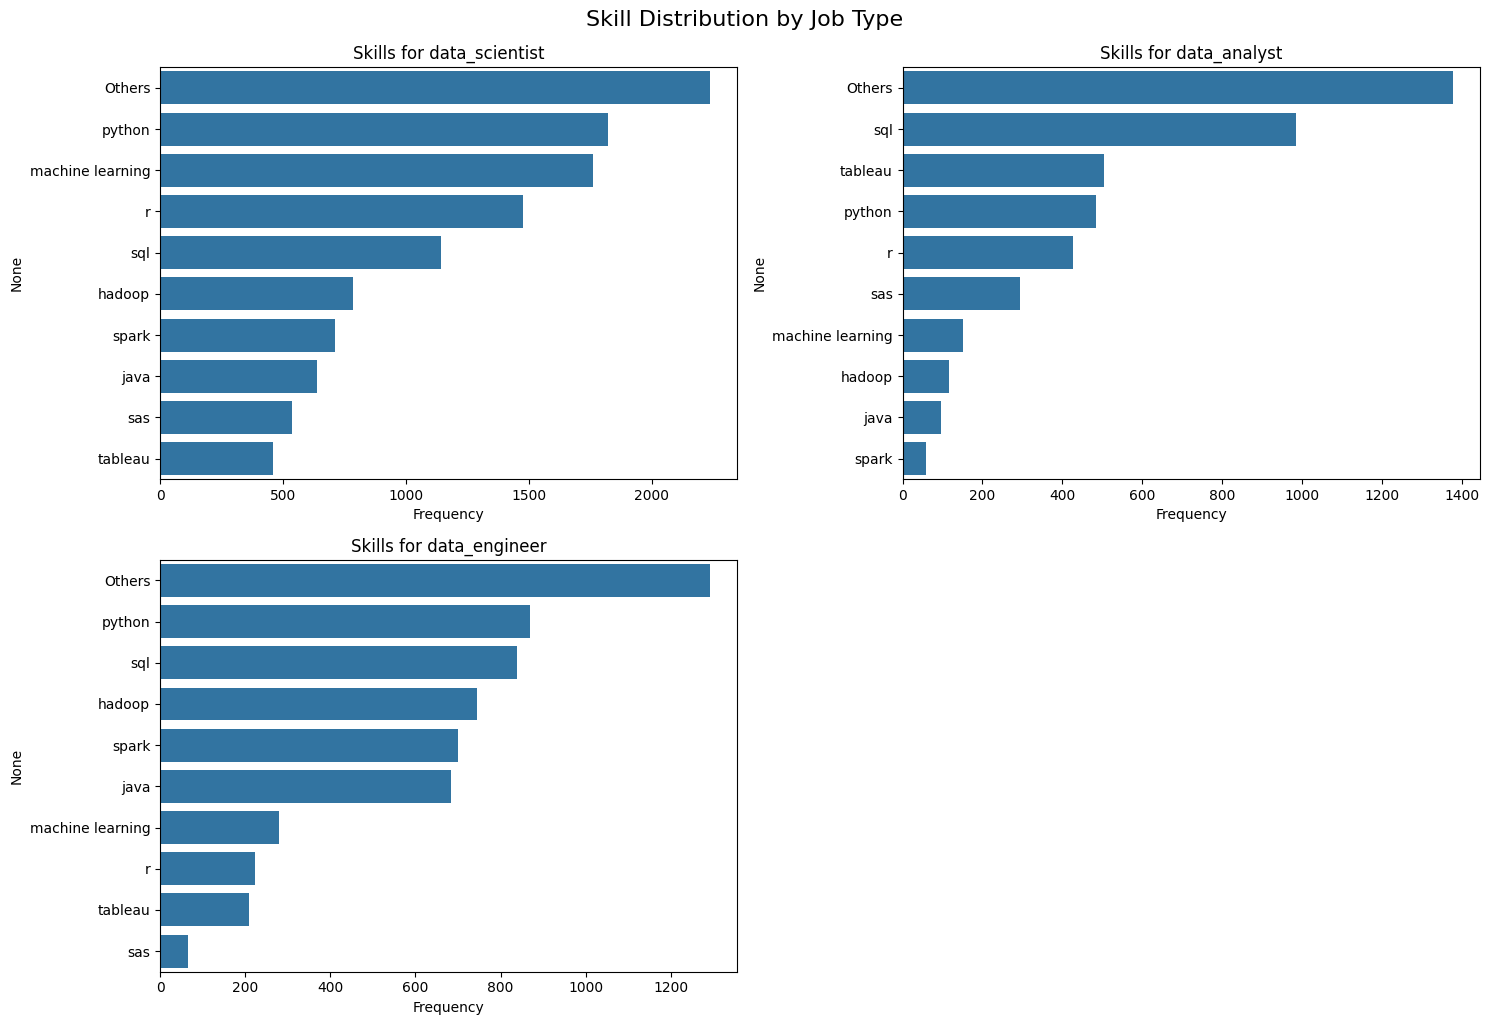


Most common skills across all jobs:
Others: 4907 occurrences (94.0%)
python: 3175 occurrences (60.8%)
sql: 2968 occurrences (56.9%)
machine learning: 2192 occurrences (42.0%)
r: 2126 occurrences (40.7%)
hadoop: 1646 occurrences (31.5%)
spark: 1471 occurrences (28.2%)
java: 1418 occurrences (27.2%)
tableau: 1173 occurrences (22.5%)
sas: 894 occurrences (17.1%)


In [23]:
# Additional Analysis: Skill distribution by job type
plt.figure(figsize=(15, 10))

# Create subplots for each job type
job_types = data_clean['Job_Type'].unique()
n_jobs = len(job_types)

for i, job_type in enumerate(job_types, 1):
    plt.subplot(2, (n_jobs+1)//2, i)
    job_data = data_clean[data_clean['Job_Type'] == job_type]
    skill_sums = job_data[skill_columns].sum().sort_values(ascending=False)

    sns.barplot(x=skill_sums.values, y=skill_sums.index)
    plt.title(f'Skills for {job_type}')
    plt.xlabel('Frequency')
    plt.tight_layout()

plt.suptitle('Skill Distribution by Job Type', fontsize=16, y=1.02)
plt.show()

# Most common skills overall
print("\nMost common skills across all jobs:")
overall_skills = data_clean[skill_columns].sum().sort_values(ascending=False)
for skill, count in overall_skills.items():
    percentage = (count / len(data_clean)) * 100
    print(f"{skill}: {count} occurrences ({percentage:.1f}%)")